In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv("data/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Encoding

In [5]:
data.drop(columns=['Car_Name', 'Owner'], inplace=True)

In [6]:
print(data["Fuel_Type"].value_counts())
print(data["Seller_Type"].value_counts())
print(data["Transmission"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
le= LabelEncoder()
data["Fuel_Type"]= le.fit_transform(data["Fuel_Type"])
data["Seller_Type"]= le.fit_transform(data["Seller_Type"])
data["Transmission"]= le.fit_transform(data["Transmission"])

In [8]:
# data= pd.get_dummies(data, columns=["Fuel_Type","Seller_Type","Transmission"])

In [9]:
# data["Fuel_Type"]= data["Fuel_Type"].map({"Petrol":0, "Diesel":1, "CNG":2})
# data["Seller_Type"]= data["Seller_Type"].map({"Dealer":0, "Individual":1})
# data["Transmission"]= data["Transmission"].map({"Manual":0, "Automatic":1})

In [10]:
X= data.drop(["Selling_Price"], axis=1)
Y= data["Selling_Price"]

In [11]:
# split the data into training and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
print(X.shape)
print(Y.shape)

(301, 6)
(301,)


In [13]:
lm= LinearRegression()

In [14]:
lm.fit(Xtrain, Ytrain)

LinearRegression()

### Model Evaluation 

In [15]:
training_data= lm.predict(Xtrain)

In [16]:
error_score= r2_score(Ytrain, training_data)

In [17]:
print("R-square error:", error_score)
print("Mean Square Error:", sqrt(mean_squared_error(Ytrain, training_data)))

R-square error: 0.88179537716577
Mean Square Error: 1.7677619555884938


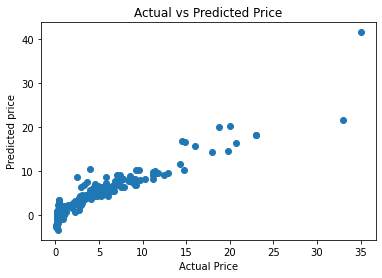

In [18]:
plt.scatter(Ytrain, training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [19]:
test_data= lm.predict(Xtest)

In [20]:
error_score1= r2_score(Ytest, test_data)

In [21]:
print("R-square error:", error_score1)
print("Mean Square Error:", sqrt(mean_squared_error(Ytest, test_data)))

R-square error: 0.8523472034361441
Mean Square Error: 1.844252822935056


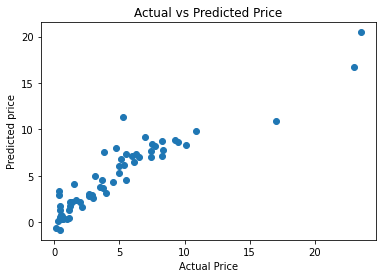

In [22]:
plt.scatter(Ytest, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

## Lasso Regression

In [86]:
lass= Lasso(alpha=0.2)

In [87]:
lass.fit(Xtrain, Ytrain)

Lasso(alpha=0.2)

### Model Evaluation 

In [88]:
training_data= lass.predict(Xtrain)

In [89]:
error_score= r2_score(Ytrain, training_data)

In [90]:
print("R-square error:", error_score)
print("Mean Square Error:", sqrt(mean_squared_error(Ytrain, training_data)))

R-square error: 0.8569603462382732
Mean Square Error: 1.944620131457751


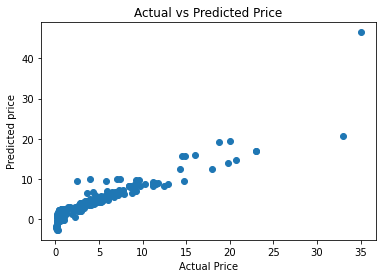

In [91]:
plt.scatter(Ytrain, training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

In [92]:
test_data= lass.predict(Xtest)

In [93]:
error_score1= r2_score(Ytest, test_data)

In [94]:
print("R-square error:", error_score1)
print("Mean Square Error:", sqrt(mean_squared_error(Ytest, test_data)))

R-square error: 0.8242589408207156
Mean Square Error: 2.012038275582683


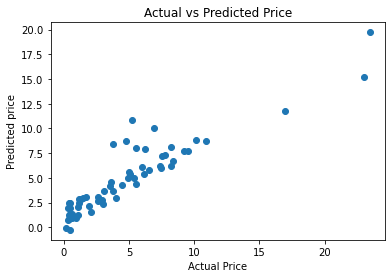

In [95]:
plt.scatter(Ytest, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted Price")
plt.show()

**In this particular dataset there is a linear relationship between the target and the independent variable**
**That is why linear regression is performing better compared to  a penalized regression like lasso**

In [97]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
Year,1.000000,0.236141,-0.047584,-0.524342,-0.053643,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510
Fuel_Type,-0.053643,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240
Transmission,0.000394,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000


In [98]:
import seaborn as sns

<AxesSubplot:>

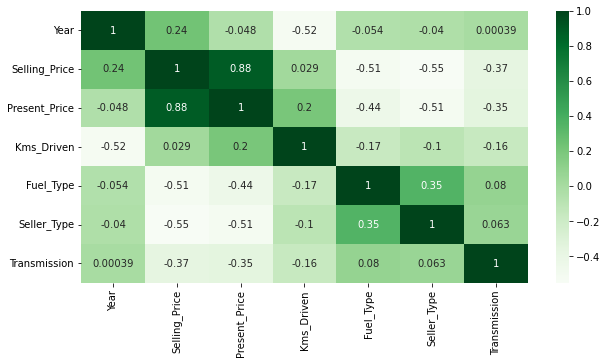

In [105]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), annot= True, cmap= "Greens")